<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - In-class Exam



---
#### Guidelines 
- This is your notebook for your in-class midterm exam. 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, if you do, your answers will be considered invalid = **0%**).
- The in-class exam is **10%** of your total midterm score.
- During the exam you can only have the following websites open in your browser:
    * [ECON-628-01 github][1]
    * ECON-628-01-yourgithubusersname 
    * [StackOverflow][2]  
- If we noticed that your computer browser has other websites open, you will be asked to **close your computer, leave the class, and will get an score of 0%**
- Remember: if you are using code from someone else/online (StackOverflow) you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
    


- Once you are done with your exam use this [link][3] to **submit** the GitHub link to your take home exam.
[1]:https://github.com/jrcmalunay/ECON628-01 "ECON-628-01 github"
[2]:http://stackoverflow.com "StackOverflow"
[3]: https://docs.google.com/forms/d/e/1FAIpQLSercXrXIky91taz98tPviIqA8C0FaQZ_WIfNoRYxMbV5wPtkg/viewform "link"

---



### Dataset 
This dataset comes from the Sleep and the allocation of time [paper][1] by Biddle, Jeff and Hamermesh, Daniel where using aggregated data for 12 countries, a cross section of microeconomic data, and a panel of households, they demonstrate that increases in time in the labor market reduce sleep!!!! The variables are:
https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents

| **Name**   |      **Description**     |  
|----------|:-------------:|
| age | in years | 
| black | =1 if black | 
| case | identifier | 
| clerical | =1 if clerical worker |
| construc | =1 if construction worker |
| educ | years of schooling|
| earns74 | total earnings, 1974 |
| gdhlth | =1 if in good or excellent health |
| inlf |  =1 if in labor force |
|leis1  |sleep - totwrk|
|leis2  |slpnaps - totwrk|
|leis3  |rlxall - totwrk|
| smsa |  =1 if living in SMSA |
| | SMSA is the Standard Metropolitan Statistical Area, an integrated economic and social unit having a large population nucleus. It is a good indicator of living in a city.|
|lhrwage| log hourly wage|
|lothinc | log othinc, unless othinc < 0
| male |  =1 if male |
| marr | =1 if married |
| prot | =1 if Protestant |
|rlxall |slpnaps + personal activs|
| selfe  | =1 if self employed|
| sleep | minutes sleep at night, per week |
| slpnaps | minutes sleep, including naps, per week |
| south |  =1 if live in south |
| spsepay |  spousal wage income |
| spwrk75 |  =1 if spouse works |
| totwrk | minutes worked per week |
| union |  =1 if belong to union |
| worknrm | minutes work main job |
| workscnd | minutes work second job |
|exper     | age - educ - 6 |
| yngkid | =1 if children less than 3 years present |
| yrsmarr | years married |
| hrwage | hourly wage |
|agesq   |age^2|


[1]:https://core.ac.uk/download/pdf/6820141.pdf "paper"


---


---

## The Scenario
---
The PI (principal investigator) of a project you are working for, claims that nowadays people sleep "more" because access to the internet and the mechanization of labor reduces their work time. Based on this assumption, he wants to implement a literacy program that requires participants to read 1 chapter of a book one hour before their bed time and one section of an introduction to mathematics book one hour before they leave their home for work.

**He asks you to find out if people are indeed sleeping more or not, before he implements the literacy program.** 
Assume that, you don't have any other dataset but the one from the Biddle and Hamermesh paper to answer this question. 
Use all the predictive methods, you consider neccesary to give  an answer to the PI, and make sure you explain the output of your predictive analysis.


---

### Basic package imports
---

All the commands come from the same lecture MEGA_lab_regression_solutions

In [101]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import urllib
import requests

from io import StringIO

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Read/load the dataset "sleep_bh.csv" and do an initial overview of the data
    Check the shape of your data
    Cheeck the type of values
    Identify which variables have missing values
    Print a list of the indices where there are missing values
---

In [102]:
midt = pd.read_csv('/Users/feliperodriguez/Desktop/ECON-628-01-felipe1504/datasets/sleep/sleep_bh.csv')

csv_url = 'https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents'
midt = pd.read_csv(csv_url, names = ['age',
          'black',
          'case',
          'clerical',
          'construct',
          'educ',
          'earns74',
          'gdhlth',
          'inlf',
          'leis1',
          'leis2',
          'leis3',
          'smsa',
          'lhrwage',
          'lothinc',
          'male',
          'marr',
          'prot',
          'rlxall',
          'selfe',
          'sleep',
          'slpnaps',
          'south',
          'spsepay',
          'spwrk75',
          'totwrk',
          'union',
          'worknrm',
          'workscnd',
          'exper',
          'yngkid',
          'yrsmarr',
          'hrwage',
          'agesq'])

In [103]:
midt.head(20)

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
5,41,0,6,0.0,0.0,12,0,1,1,4812,...,0,1205,0,0,1205,23,0,23,19.249998,1681
6,35,0,7,0.0,0.0,12,8250,1,1,4787,...,1,2113,0,2113,0,17,1,0,1.440000,1225
7,47,0,8,0.0,0.0,13,0,1,1,3544,...,0,3608,0,3608,0,28,0,24,15.010007,2209
8,32,0,9,0.0,0.0,17,18750,1,1,4359,...,0,2353,1,2353,0,9,0,11,4.329998,1024
9,30,0,10,0.0,0.0,15,11750,1,1,4211,...,1,2851,0,2851,0,9,0,7,2.959999,900


In [104]:
midt.describe()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,...,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,532.000000,706.000000
mean,38.815864,0.049575,353.500000,0.182331,0.030075,12.780453,9767.705382,0.890935,0.753541,4690.723796,...,0.480170,2122.920680,0.218130,2093.252125,29.668555,20.035411,0.128895,11.769122,5.082839,1635.144476
std,11.342637,0.217219,203.948932,0.335413,0.148366,2.784702,9323.588151,0.311942,0.431254,908.049561,...,0.499961,947.470123,0.413269,945.301457,148.834262,12.377520,0.335321,11.591227,3.704385,950.102976
min,23.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1745.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000,529.000000
25%,29.000000,0.000000,177.250000,0.000000,0.000000,12.000000,2500.000000,1.000000,1.000000,4109.750000,...,0.000000,1553.500000,0.000000,1538.000000,0.000000,10.000000,0.000000,0.000000,NaN,841.000000
50%,36.000000,0.000000,353.500000,0.000000,0.000000,12.000000,8250.000000,1.000000,1.000000,4620.000000,...,0.000000,2288.000000,0.000000,2275.000000,0.000000,17.000000,0.000000,9.000000,NaN,1296.000000
75%,48.000000,0.000000,529.750000,0.182331,0.030075,16.000000,13750.000000,1.000000,1.000000,5203.750000,...,1.000000,2691.750000,0.000000,2635.500000,0.000000,30.000000,0.000000,20.000000,NaN,2304.000000
max,65.000000,1.000000,706.000000,1.000000,1.000000,17.000000,42500.000000,1.000000,1.000000,7417.000000,...,1.000000,6415.000000,1.000000,6415.000000,1337.000000,55.000000,1.000000,43.000000,35.509987,4225.000000


In [105]:
midt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
age         706 non-null int64
black       706 non-null int64
case        706 non-null int64
clerical    706 non-null float64
construc    706 non-null float64
educ        706 non-null int64
earns74     706 non-null int64
gdhlth      706 non-null int64
inlf        706 non-null int64
leis1       706 non-null int64
leis2       706 non-null int64
leis3       706 non-null int64
smsa        706 non-null int64
lhrwage     532 non-null float64
lothinc     706 non-null float64
male        706 non-null int64
marr        706 non-null int64
prot        706 non-null int64
rlxall      706 non-null int64
selfe       706 non-null int64
sleep       706 non-null int64
slpnaps     706 non-null int64
south       706 non-null int64
spsepay     706 non-null int64
spwrk75     706 non-null int64
totwrk      706 non-null int64
union       706 non-null int64
worknrm     706 non-null int64
workscnd    706 non

## 2. Drop missing values (not the best practice), but OK for exam 
    Once you drop the missing values, check that the list of binary variables have values of 1 an 0
        Note: at this point the inlf predictor/variable should have the value of 1
---

In [106]:
print midt.isnull().sum()

age           0
black         0
case          0
clerical      0
construc      0
educ          0
earns74       0
gdhlth        0
inlf          0
leis1         0
leis2         0
leis3         0
smsa          0
lhrwage     174
lothinc       0
male          0
marr          0
prot          0
rlxall        0
selfe         0
sleep         0
slpnaps       0
south         0
spsepay       0
spwrk75       0
totwrk        0
union         0
worknrm       0
workscnd      0
exper         0
yngkid        0
yrsmarr       0
hrwage      174
agesq         0
dtype: int64


In [107]:
print midt['hrwage'].mean()
           
print midt['lhrwage'].mean()

5.08283858289
1.43097716622


In [108]:
midt['hrwage'].fillna(np.mean(midt['hrwage']), inplace=True)

In [109]:
midt['lhrwage'].fillna(np.mean(midt['lhrwage']), inplace=True)

In [110]:
print midt.isnull().sum()

age         0
black       0
case        0
clerical    0
construc    0
educ        0
earns74     0
gdhlth      0
inlf        0
leis1       0
leis2       0
leis3       0
smsa        0
lhrwage     0
lothinc     0
male        0
marr        0
prot        0
rlxall      0
selfe       0
sleep       0
slpnaps     0
south       0
spsepay     0
spwrk75     0
totwrk      0
union       0
worknrm     0
workscnd    0
exper       0
yngkid      0
yrsmarr     0
hrwage      0
agesq       0
dtype: int64


## 3. Check for correlations
    Implement a correlation heatmap
---

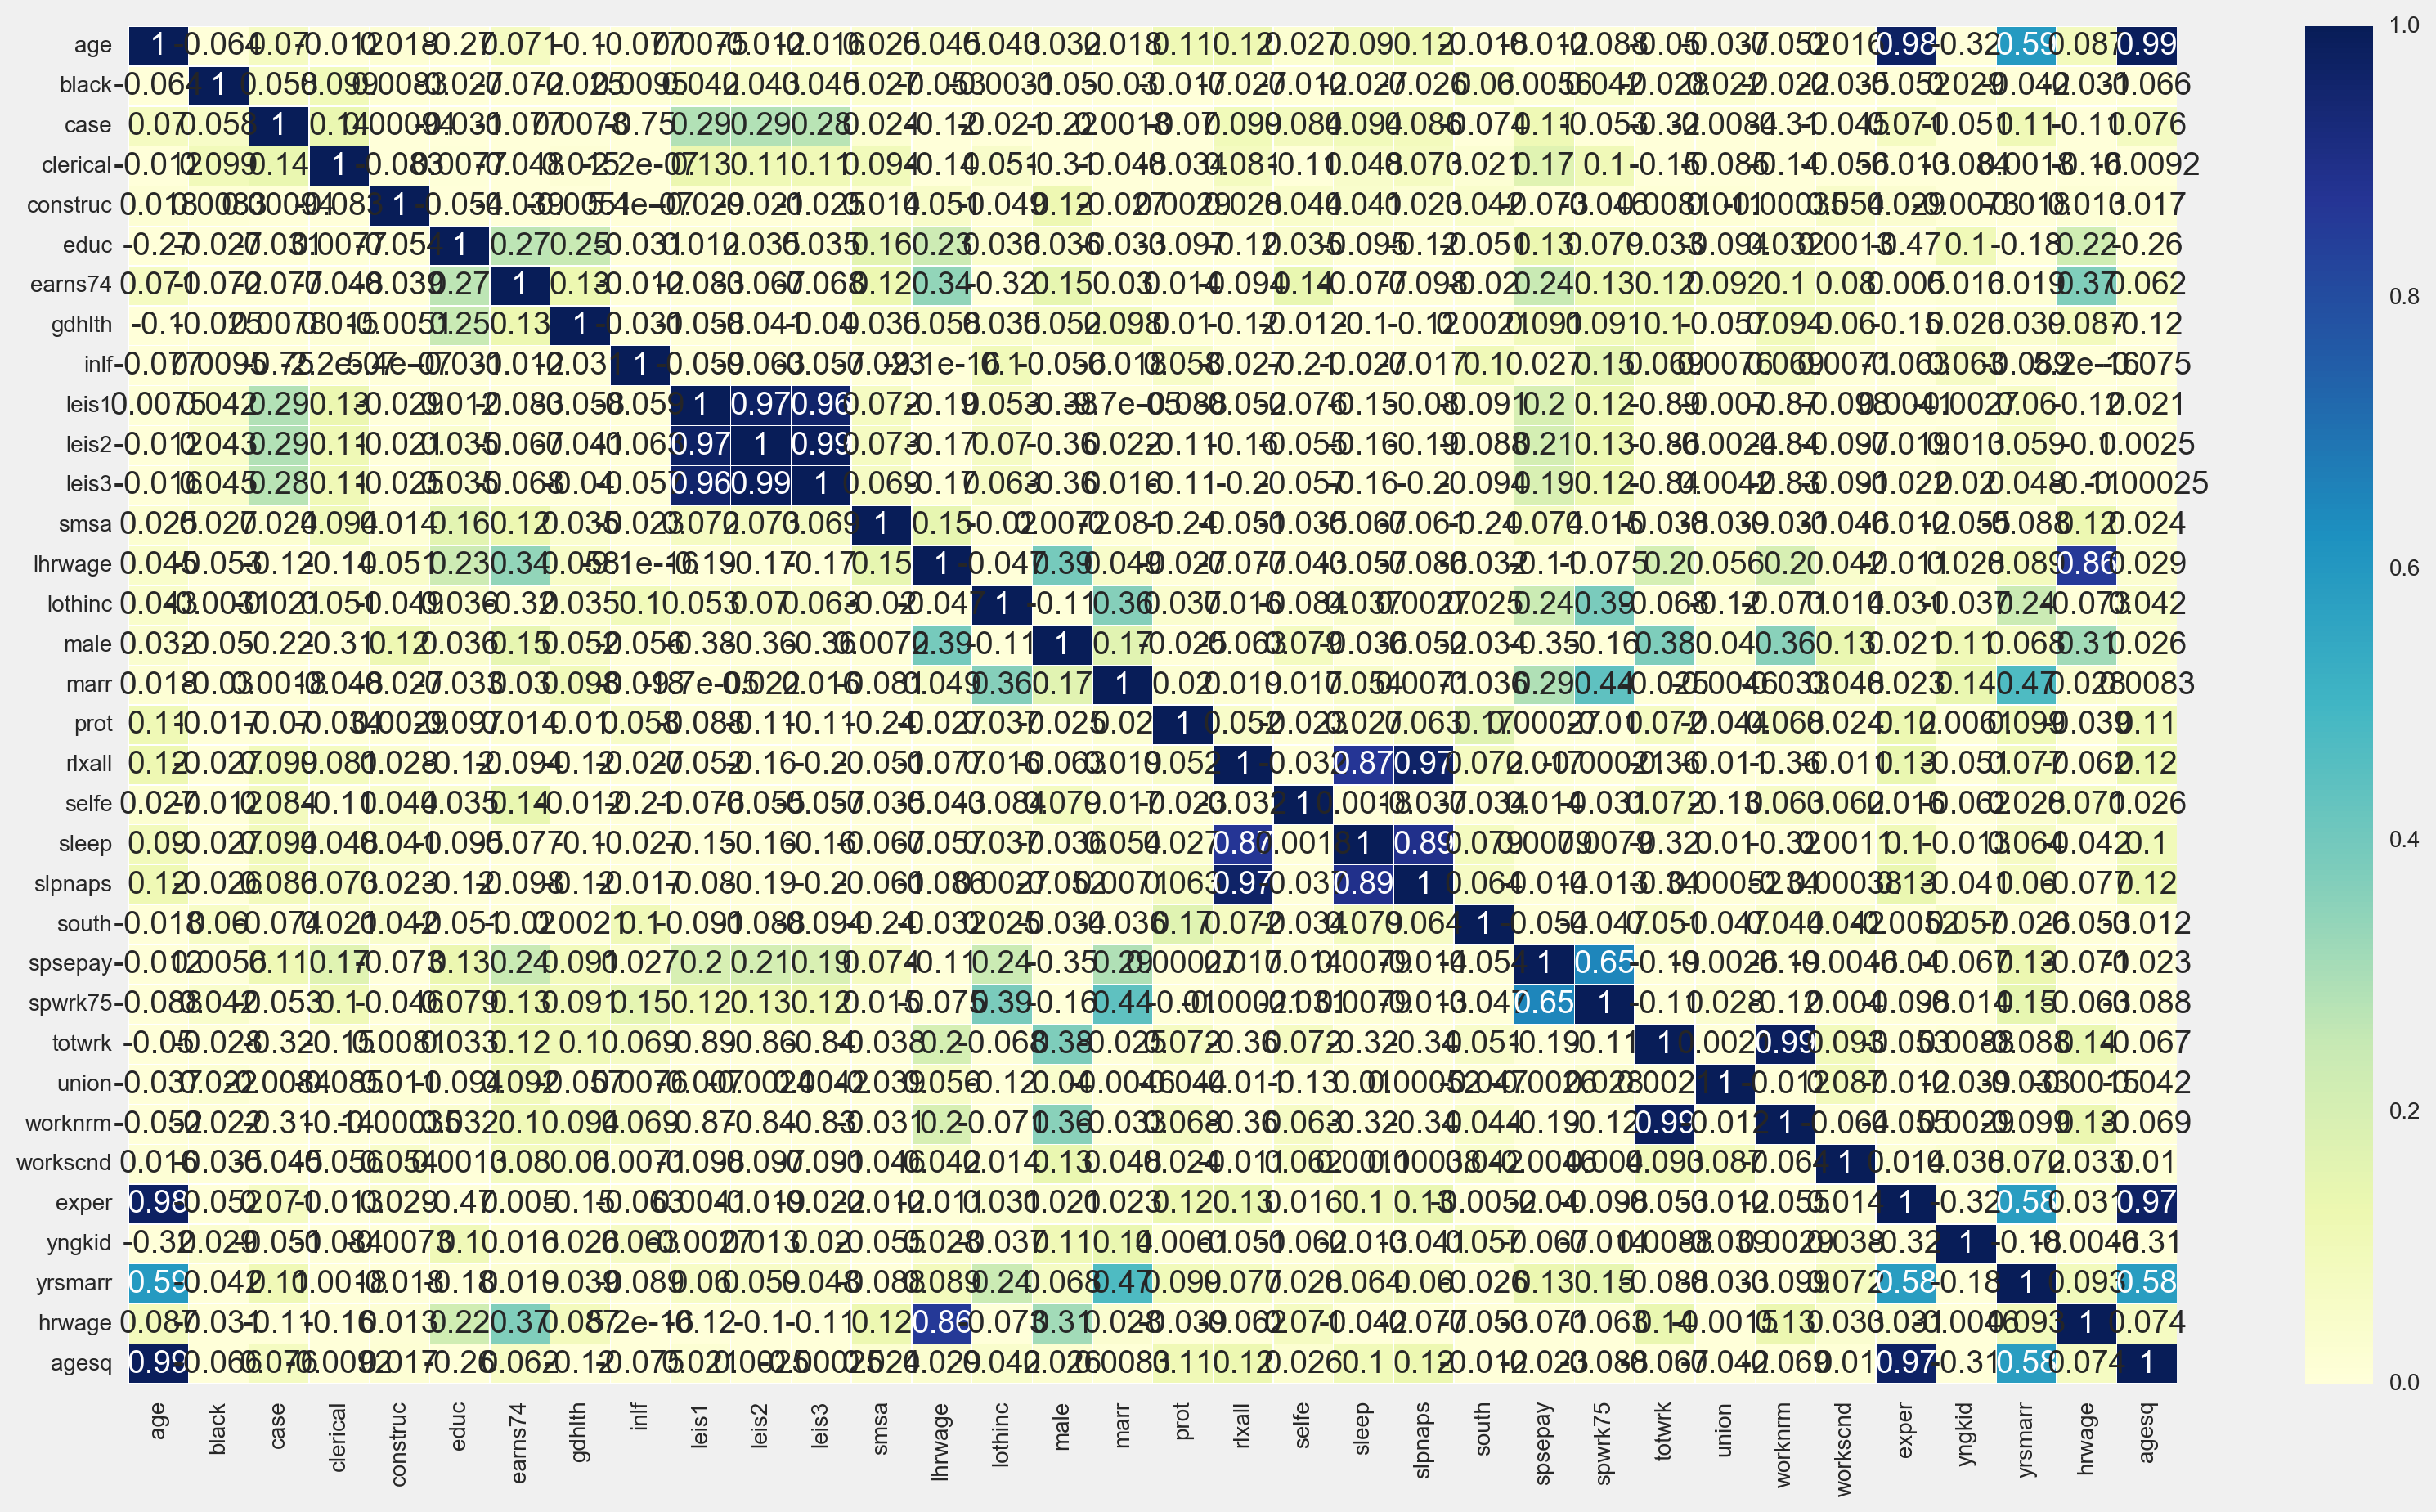

In [111]:
fig = plt.figure(figsize=(18,10))
ax = fig.gca()
sns.heatmap(midt.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

## 4.1 Predictions
    Define y (mins sleep at night, per week)
    Define X (where X are your predictors => make sure to include the correct variables, i.e. exclude y, case, lothinc, and **other** variables)
    Standarized your Xs
    Train test split:
        splits your data into train test, 
        assigns a size of 30% to your test set, and use random_state=10
        print the shape of your train (X, y) and test (X, y)
---

In [112]:
y = midt.sleep.values
x = midt[['age', 'black', 'clerical', 'construc', 'educ', 'earns74', 'gdhlth', 'inlf', 'leis1', 'leis2', 'leis3', 'smsa', 'lhrwage', 'male', 'marr', 'prot', 'rlxall', 'selfe', 'slpnaps', 'south', 'spsepay', 'spwrk75', 'totwrk', 'union', 'worknrm', 'workscnd', 'exper', 'yngkid', 'yrsmarr', 'hrwage', 'agesq']]

In [113]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xn = ss.fit_transform(x)

In [114]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3, random_state=10)
print x_train.shape, x_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(494, 31) (212, 31)


(494,) (212,)


## 4.2 Machine Learning models 
    OLS, Regularization methods and evaluate the performance of your models on the train and test datasets
    Cross validate at least 10 times the R^2 scores of your models and print the average R^2 scores 
    For the OLS implement an scatter plot that shows the relation between your predicted values and the y_test values (the actual values)
    
---

## 4.2.1 OLS
    
---

In [115]:
from sklearn.linear_model import LinearRegression

## define a linear regression model
lr = LinearRegression()

## fit your model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [117]:
''' Function that calls the MSE and R^2 at once, using the name of the method and calling the best model'''

def rsquare_meansquare_error(train_y, test_y, train_x, test_x, test, best_model):
    """ first we need to predict on the test and train data"""
    y_train_pred = best_model.predict(train_x)
    y_test_pred = best_model.predict(test_x)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [118]:
rsquare_meansquare_error(y_train, y_test, x_train, x_test, "OLS", lr)

MSE OLS train data: 0.00, test data: 0.00
R^2 OLS train data: 1.00, test data: 1.00


## 4.2.2 Regularization
    
---

In [119]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

###### Ridge

In [120]:
## Find the optimal alpha
ridge_alphas = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(x_train, y_train)
print (optimal_ridge.alpha_)

1.0


In [121]:
## Implement the Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)

## Fit the Ridge regression
ridge.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [122]:
## Evaluate the Ridge Regression
rsquare_meansquare_error(y_train, y_test, x_train, x_test, "Ridge", ridge)

MSE Ridge train data: 104.29, test data: 126.45
R^2 Ridge train data: 1.00, test data: 1.00


#### Lasso

In [123]:
## Find the optimal alpha
optimal_lasso = LassoCV(n_alphas=300, cv=10, verbose=1)
optimal_lasso.fit(x_train, y_train)
print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.376965670873


................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished
/Users/feliperodriguez/anaconda/envs/econ/lib/python2.7/site-packages/sklearn/line

In [124]:
## Implement the Lasso Regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

## fit your regression
lasso.fit(x_train, y_train)

Lasso(alpha=0.37696567087330252, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [125]:
## Evaluate the Lasso Regression
rsquare_meansquare_error(y_train, y_test, x_train, x_test, "Lasso", lasso)

MSE Lasso train data: 8.89, test data: 9.67
R^2 Lasso train data: 1.00, test data: 1.00


##### Elastic Net

In [126]:
## Find the optimal alphas
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5, verbose=1)
optimal_enet.fit(x_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.376965670873
1.0


......................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   14.9s finished


In [127]:
##  Create a model Enet
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

## Fit your model
enet.fit(x_train, y_train)

ElasticNet(alpha=0.37696567087330252, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [128]:
## Evaluate the Elastic Net Regression
rsquare_meansquare_error(y_train, y_test, x_train, x_test, "Elastic Net", enet)

MSE Elastic Net train data: 8.89, test data: 9.67
R^2 Elastic Net train data: 1.00, test data: 1.00


## 4.2.3 What are the features that are the best predictors of mins sleep at night, per week
    What are the features with coefficients greater than 0
---

In [129]:
''' Here I am defining a function to print the coefficients, their absolute values and the non-absolute values'''
def best_reg_method(x, best_regulari):
    method_coefs = pd.DataFrame({'variable':x.columns, 
                                 'coef':best_regulari.coef_, 
                                 'abs_coef':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    '''you can change the number inside head to display more or less variables'''
    return method_coefs.head(10)

## 4.2.3.1 Bonus
    Define a function that creates and prints the distribution of residuals on the train and test data from all the methods
---

In [130]:
best_reg_method(x, ridge)

,abs_coef,coef,variable
8,859.159795,-859.159795,leis1
22,248.344573,-248.344573,totwrk
24,242.872868,-242.872868,worknrm
10,195.066110,195.066110,leis3
9,190.702737,190.702737,leis2
18,124.869316,124.869316,slpnaps
16,113.510008,113.510008,rlxall
25,38.371451,-38.371451,workscnd
30,4.258496,4.258496,agesq
0,2.059126,-2.059126,age


In [131]:
best_reg_method(x, lasso)

,abs_coef,coef,variable
8,893.918158,-893.918158,leis1
9,553.687030,553.687030,leis2
18,311.044232,311.044232,slpnaps
22,185.183163,-185.183163,totwrk
10,161.114745,161.114745,leis3
16,91.999254,91.999254,rlxall
25,0.000000,-0.000000,workscnd
24,0.000000,-0.000000,worknrm
26,0.000000,-0.000000,exper
27,0.000000,0.000000,yngkid


In [132]:
best_reg_method(x, enet)

,abs_coef,coef,variable
8,893.918158,-893.918158,leis1
9,553.687030,553.687030,leis2
18,311.044232,311.044232,slpnaps
22,185.183163,-185.183163,totwrk
10,161.114745,161.114745,leis3
16,91.999254,91.999254,rlxall
25,0.000000,-0.000000,workscnd
24,0.000000,-0.000000,worknrm
26,0.000000,-0.000000,exper
27,0.000000,0.000000,yngkid


## 4.2.4 Regression Tree 
    Gridsearch your tree
    Print the best parameters and best score from your gridsearch.
    Evaluate the performance of your tree
    Print the features that best explain your Y, are these features the same as the features you found before from the regularization methods or OLS
    
    OPTIONAL: Visualize the tree ONLY if your computer lets you do it. Your grade won't be penalized for not printing the tree, nor you will receive extra points for visualization the tree
---

In [133]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

## Here is the gridsearch
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

# ## Here crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

In [134]:
## Fit the regresion tree
dtr_gs.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [135]:
## Print Best Estimator, parameters and score
''' dtr_best = is the regression tree regressor with best parameters/estimators'''
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 10}


best score 0.786881664583


In [136]:
##features that best explain your Y
''' Here I am defining a function to print feature importance using best models'''
def feature_importance(x, best_model):
    feature_importance = pd.DataFrame({'feature':x.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance  

In [137]:
feature_importance(x, dtr_best)

,feature,importance
18,slpnaps,0.912803
16,rlxall,0.067942
8,leis1,0.008299
28,yrsmarr,0.003135
22,totwrk,0.003032
19,south,0.002169
12,lhrwage,0.001743
11,smsa,0.000877
27,yngkid,0.000000
26,exper,0.000000


There are some coicidences in terms of the best predictors. slpnaps, rlxall, leis1, totwork were some of the best predictors when I used lasso and ridge. However, some other variables that by intution may seem important are not indentify by the regression tree such as totwork.

In [138]:
## Predict 
y_pred_dtr= dtr_best.predict(x_test)
y_pred_dtr

array([ 2023.08333333,  3185.60416667,  3185.60416667,  3506.80487805,
        3720.57894737,  2890.73809524,  2890.73809524,  3947.13636364,
        3185.60416667,  4129.        ,  3376.25      ,  3232.9       ,
        3506.80487805,  3593.17647059,  2890.73809524,  2769.        ,
        3390.01923077,  3947.13636364,  3720.57894737,  2769.        ,
        3390.01923077,  3390.01923077,  3947.13636364,  2890.73809524,
        2890.73809524,  2890.73809524,  2023.08333333,  2665.7       ,
        3095.375     ,  3301.2       ,  3738.        ,  3738.        ,
        3185.60416667,  3720.57894737,  3947.13636364,  2526.26666667,
        3506.80487805,  3947.13636364,  3738.        ,  3720.57894737,
        3506.80487805,  3947.13636364,  2890.73809524,  2890.73809524,
        2023.08333333,  3738.        ,  3301.2       ,  2526.26666667,
        3307.53333333,  3506.80487805,  3185.60416667,  4129.        ,
        3390.01923077,  3095.375     ,  2890.73809524,  3720.57894737,
      

In [139]:
## Evaluate the Regression Tree performance on your train and test data
rsquare_meansquare_error(y_train, y_test, x_train, x_test, "Regression tree", dtr_best)

MSE Regression tree train data: 26128.70, test data: 46559.91
R^2 Regression tree train data: 0.86, test data: 0.79


Unfortunately I cannot use pydotplus

## 4.2.5 Random Forest Regression Tree
    Make sure you gridsearch your Random Forest
    Evaluate the performance
    Print the features that best explain mins sleep at night, per week 
---



In [140]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [141]:
## Fit your random forest tree
estimator_rfr.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   21.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [142]:
## Print the best estimator, parameters and score
''' rfr_best = is the random forest regression tree regressor with best parameters/estimators'''
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=7, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'min_samples_split': 3, 'max_leaf_nodes': 7, 'n_estimators': 100, 'max_depth': 5}


best score 0.822610102005


In [143]:
## Print the feauure importance
feature_importance(x, rfr_best)

,feature,importance
18,slpnaps,0.939016
16,rlxall,0.054202
26,exper,0.001013
8,leis1,0.000905
30,agesq,0.000833
4,educ,0.000550
14,marr,0.000504
10,leis3,0.000498
9,leis2,0.000471
24,worknrm,0.000447


In [144]:
## Predict
y_pred_rfdtr= rfr_best.predict(x_test)
y_pred_rfdtr

array([ 2409.43200903,  3142.17044796,  3140.49732853,  3476.86285429,
        3828.33200549,  2892.47378616,  2962.0752489 ,  3857.5725846 ,
        3144.21249656,  3967.89798541,  3424.77877413,  3305.75887631,
        3424.77877413,  3472.18833104,  2898.05030472,  2738.30653855,
        3391.75138826,  3842.38710976,  3841.41760266,  2670.99197998,
        3387.48926696,  3393.99470425,  3874.38894849,  2929.75608426,
        2886.48414604,  2886.48414604,  1643.65829831,  2691.53265138,
        3079.29346058,  3399.91939823,  3676.38220537,  3658.0105748 ,
        3140.49732853,  3834.10219973,  3813.31606243,  2606.48949683,
        3536.1162546 ,  3817.0073795 ,  3676.38220537,  3809.18875736,
        3475.19708741,  3828.96804184,  2929.75608426,  2886.48414604,
        2420.71794365,  3676.38220537,  3403.55147811,  2558.02030438,
        3305.75887631,  3441.53871198,  3144.21249656,  3959.51062254,
        3313.97127948,  3086.77696492,  2931.83099083,  3838.81930287,
      

In [145]:
## Evaluate your model
rsquare_meansquare_error(y_train, y_test, x_train, x_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 25699.72, test data: 38233.09
R^2 Random Forest Regression tree train data: 0.86, test data: 0.83


Random tree indentify several more regressions that seem to be good predictors in the model, and also most of this variables were not indentify by none of the previous models. Some of these variable are: exper, agesq, educ, marr, leis3, spsepay and construc.

## 5. Based on the MSE and R^2, in your opinion which model perform best and why?
---

In regularization model, we were able to indentify several variabls that by intuition may seem good predictors the amount of minutes sleeped at per week. However, since in these models we include all the variables by choice with the exception of case and sleep, it is fare to think that we may be overfitting the model, and infact we saw in our results that the R_square were to high (=1). In contrast with the gression tree and the random forest we found more meaningful results in term of the R_squared and the MSE of our model, and we were also able to indentity variables that seem to have higher predictive power. This make sense because we are using a lot of variables that in some war may be even correlated, such as the variables related to age and leisure. With Regression tree we found predictos that do not seem to be correlated, however the results with the random forrest we have better R2.

## 6. Was there any trade off between bias and variance whem implementing the models?
    
---

ANS:

## 7. Explain the Bias Variance trade in the model you selected?
    
---

ANS: